In [123]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [13]:
survey_df = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv")
survey_df

C:\Users\nev1L\AppData\Local\Temp\ipykernel_12696\674740157.py:1: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_df = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv")


,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,39.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,bachelor's degree,Chemistry,NaN
15616,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Electrical Engineering,NaN
15617,37.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Chemistry,NaN
15618,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,master's degree (non-professional),Math,NaN


In [14]:
survey_df = survey_df[["CityPopulation", "EmploymentStatus", "Gender", "HasDebt", \
                       "JobPref", "JobWherePref", "MaritalStatus", "Income", "SchoolDegree"]]
survey_df

,CityPopulation,EmploymentStatus,Gender,HasDebt,JobPref,JobWherePref,MaritalStatus,Income,SchoolDegree
0,"between 100,000 and 1 million",Employed for wages,male,1.0,freelance,NaN,married or domestic partnership,32000.0,"some college credit, no degree"
1,"between 100,000 and 1 million",Employed for wages,male,0.0,work for a startup,in an office with other developers,NaN,15000.0,"some college credit, no degree"
2,more than 1 million,Employed for wages,male,0.0,start your own business,NaN,NaN,48000.0,high school diploma or equivalent (GED)
3,more than 1 million,Employed for wages,female,1.0,work for a startup,from home,NaN,43000.0,bachelor's degree
4,"between 100,000 and 1 million",Employed for wages,female,1.0,work for a medium-sized company,in an office with other developers,NaN,6000.0,"some college credit, no degree"
...,...,...,...,...,...,...,...,...,...
15615,more than 1 million,Self-employed freelancer,male,1.0,start your own business,NaN,"single, never married",10000.0,bachelor's degree
15616,more than 1 million,Employed for wages,male,0.0,work for a startup,in an office with other developers,"single, never married",10000.0,bachelor's degree
15617,more than 1 million,Self-employed freelancer,male,0.0,freelance,NaN,NaN,48000.0,bachelor's degree
15618,more than 1 million,Self-employed freelancer,male,0.0,NaN,NaN,NaN,10000.0,master's degree (non-professional)


In [15]:
survey_df["Gender"].unique()

array(['male', 'female', nan, 'genderqueer', 'agender', 'trans'],
      dtype=object)

Оставим только те строки, в которых знач. переменной Gender male или female

In [16]:
survey_df = survey_df.loc[survey_df["Gender"].isin(["male", "female"]) ]
survey_df

,CityPopulation,EmploymentStatus,Gender,HasDebt,JobPref,JobWherePref,MaritalStatus,Income,SchoolDegree
0,"between 100,000 and 1 million",Employed for wages,male,1.0,freelance,NaN,married or domestic partnership,32000.0,"some college credit, no degree"
1,"between 100,000 and 1 million",Employed for wages,male,0.0,work for a startup,in an office with other developers,NaN,15000.0,"some college credit, no degree"
2,more than 1 million,Employed for wages,male,0.0,start your own business,NaN,NaN,48000.0,high school diploma or equivalent (GED)
3,more than 1 million,Employed for wages,female,1.0,work for a startup,from home,NaN,43000.0,bachelor's degree
4,"between 100,000 and 1 million",Employed for wages,female,1.0,work for a medium-sized company,in an office with other developers,NaN,6000.0,"some college credit, no degree"
...,...,...,...,...,...,...,...,...,...
15615,more than 1 million,Self-employed freelancer,male,1.0,start your own business,NaN,"single, never married",10000.0,bachelor's degree
15616,more than 1 million,Employed for wages,male,0.0,work for a startup,in an office with other developers,"single, never married",10000.0,bachelor's degree
15617,more than 1 million,Self-employed freelancer,male,0.0,freelance,NaN,NaN,48000.0,bachelor's degree
15618,more than 1 million,Self-employed freelancer,male,0.0,NaN,NaN,NaN,10000.0,master's degree (non-professional)


In [17]:
survey_df["Gender"].unique()

array(['male', 'female'], dtype=object)

C помощью однофакторного анализа проверим как Income (доход) зависит от SchoolDegree

In [26]:
df_1 = survey_df[["Income", "SchoolDegree"]].dropna()
df_1

,Income,SchoolDegree
0,32000.0,"some college credit, no degree"
1,15000.0,"some college credit, no degree"
2,48000.0,high school diploma or equivalent (GED)
3,43000.0,bachelor's degree
4,6000.0,"some college credit, no degree"
...,...,...
15615,10000.0,bachelor's degree
15616,10000.0,bachelor's degree
15617,48000.0,bachelor's degree
15618,10000.0,master's degree (non-professional)


In [27]:
df_1.SchoolDegree.unique()

array(['some college credit, no degree',
       'high school diploma or equivalent (GED)', "bachelor's degree",
       "master's degree (non-professional)",
       'trade, technical, or vocational training', "associate's degree",
       'some high school', 'professional degree (MBA, MD, JD, etc.)',
       'Ph.D.', 'no high school (secondary school)'], dtype=object)

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

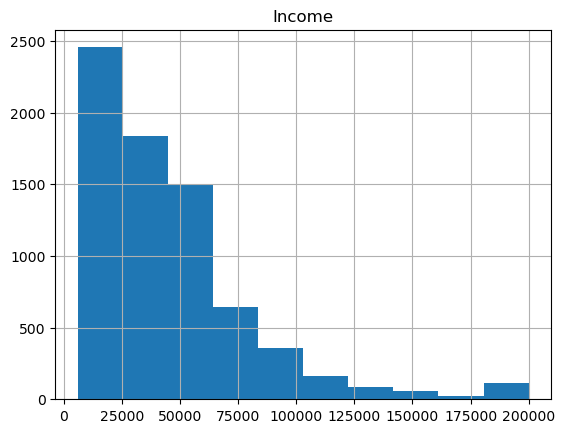

In [28]:
df_1.hist()

Из гистограммы видно что распределение Income отличается от нормального, оно экспоненциальное 

Т.к. нормальность не выполняется произведем лог-трансформацию

In [32]:
df_1["Income"] = df_1["Income"].apply(np.log10)
df_1

,Income,SchoolDegree
0,4.505150,"some college credit, no degree"
1,4.176091,"some college credit, no degree"
2,4.681241,high school diploma or equivalent (GED)
3,4.633468,bachelor's degree
4,3.778151,"some college credit, no degree"
...,...,...
15615,4.000000,bachelor's degree
15616,4.000000,bachelor's degree
15617,4.681241,bachelor's degree
15618,4.000000,master's degree (non-professional)


array([[<Axes: title={'center': 'Income'}>]], dtype=object)

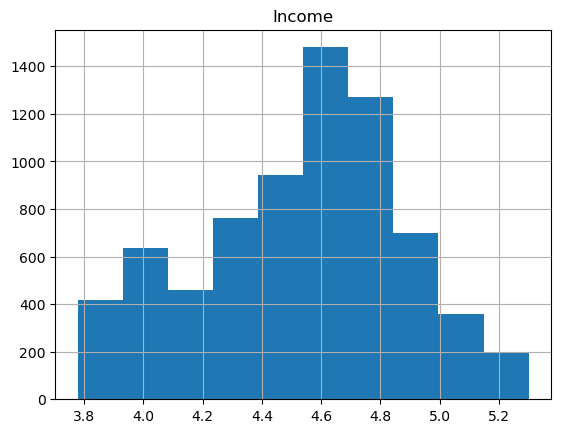

In [33]:
df_1.hist()

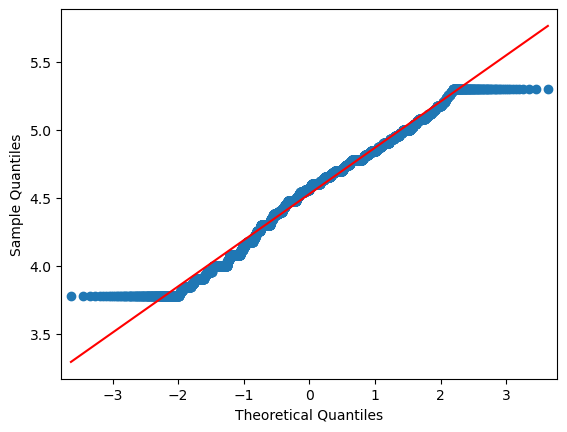

In [45]:
sm.ProbPlot(df_1["Income"], dist=stats.norm).qqplot(line="r")
plt.show()

Выборка > 2000 и имеются выбросы на хвостах распределения, то воспользуемся критерием Андерсона-Дарлинга для проверки на нормальность распределения 

In [46]:
stats.anderson(df_1["Income"])

AndersonResult(statistic=38.44861552906332, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.528657324805018, scale=0.34191911752984305)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Распределение отличается от нормального, т.к. A-стат. = 38.4 а крит. знач. при alpha = 15 % 0.576 => A-стат > крит. знач. => отвернается основная гипотеза о нормальности распределения  

Нормальность не выполняется, тогда ограничим выборку 100 строками

In [59]:
df_1 = survey_df[["Income","SchoolDegree"]].dropna().sample(n=100)
df_1

,Income,SchoolDegree
811,6000.0,bachelor's degree
777,60000.0,master's degree (non-professional)
9971,30000.0,associate's degree
10607,85000.0,bachelor's degree
4299,48000.0,"some college credit, no degree"
...,...,...
15554,200000.0,bachelor's degree
2875,27000.0,master's degree (non-professional)
14787,31200.0,"some college credit, no degree"
513,17000.0,"some college credit, no degree"


array([[<Axes: title={'center': 'Income'}>]], dtype=object)

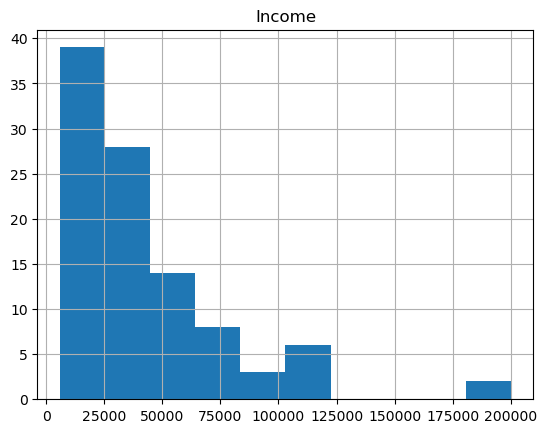

In [60]:
df_1.hist()

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

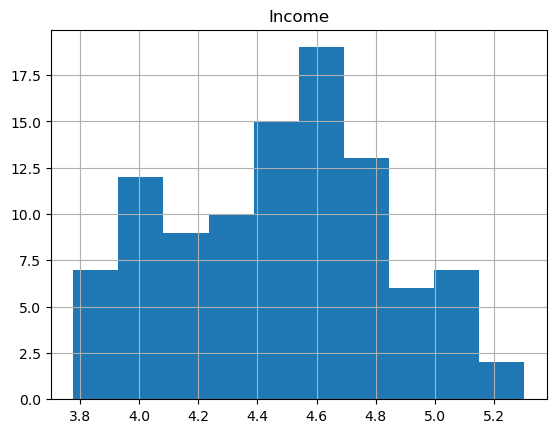

In [61]:
df_1["Income"] = df_1["Income"].apply(np.log10) # лог-трансформация
df_1.hist()

In [63]:
stats.shapiro(df_1["Income"]) # Критерий Шапира-Уилка

ShapiroResult(statistic=0.9826740622520447, pvalue=0.21353144943714142)

p-val > 0.05 => распределение нормальное 

Проверим гомоскедестичность дисперсий

In [98]:
df_1["SchoolDegree"].uniqueque()

array(["bachelor's degree", "master's degree (non-professional)",
       "associate's degree", 'some college credit, no degree', 'Ph.D.',
       'high school diploma or equivalent (GED)',
       'trade, technical, or vocational training',
       'professional degree (MBA, MD, JD, etc.)', 'some high school',
       'no high school (secondary school)'], dtype=object)

In [92]:
df_1["SchoolDegree"].value_counts()

bachelor's degree                           41
some college credit, no degree              25
master's degree (non-professional)          14
associate's degree                           7
high school diploma or equivalent (GED)      3
trade, technical, or vocational training     3
Ph.D.                                        2
professional degree (MBA, MD, JD, etc.)      2
some high school                             2
no high school (secondary school)            1
Name: SchoolDegree, dtype: int64

Объединим градации последние 7 градаций и назовем их "etc"

In [95]:
table_1 = df_1.loc[df_1["SchoolDegree"] == "bachelor's degree"]
table_1.head()

,Income,SchoolDegree
811,3.778151,bachelor's degree
10607,4.929419,bachelor's degree
8084,4.477121,bachelor's degree
15547,5.301030,bachelor's degree
3156,4.278754,bachelor's degree


In [96]:
table_2 = df_1.loc[df_1["SchoolDegree"] == "some college credit, no degree"]
table_2.head()

,Income,SchoolDegree
4299,4.681241,"some college credit, no degree"
1404,4.000000,"some college credit, no degree"
3504,4.000000,"some college credit, no degree"
4370,4.176091,"some college credit, no degree"
12690,4.096910,"some college credit, no degree"


In [97]:
table_3 = df_1.loc[df_1["SchoolDegree"] == "master's degree (non-professional)"]
table_3.head()

,Income,SchoolDegree
777,4.778151,master's degree (non-professional)
1432,4.477121,master's degree (non-professional)
15236,4.380211,master's degree (non-professional)
13565,4.681241,master's degree (non-professional)
15463,4.556303,master's degree (non-professional)


In [105]:
table_4 = df_1.loc[df_1["SchoolDegree"].isin(["associate's degree", 'Ph.D.',\
       'high school diploma or equivalent (GED)',\
       'trade, technical, or vocational training',\
       'professional degree (MBA, MD, JD, etc.)', 'some high school',\
       'no high school (secondary school)'])]

table_4 = table_4.drop(columns=["SchoolDegree"])
table_4["SchoolDegree"] = "etc" 
table_4.head()

,Income,SchoolDegree
9971,4.477121,etc
2939,5.041393,etc
8749,4.579784,etc
1572,4.301030,etc
7693,3.929419,etc


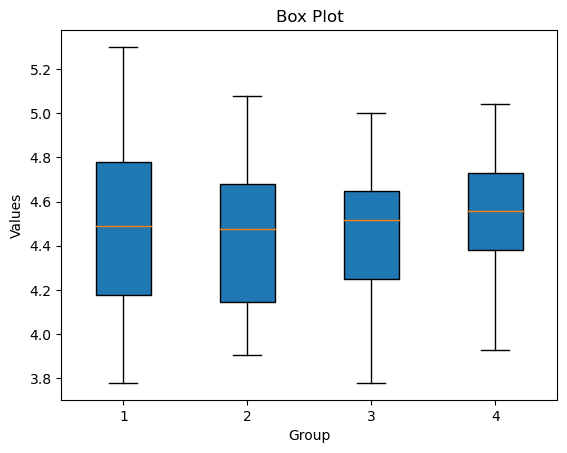

In [115]:
plt.boxplot([table_1["Income"], table_2["Income"], table_3["Income"], table_4["Income"]],  patch_artist=True)
plt.title("Box-Plot")
plt.xlabel("Group")
plt.ylabel("Values")
plt.show()

In [119]:
stats.levene(table_1["Income"], table_2["Income"], table_3["Income"], table_4["Income"])

LeveneResult(statistic=1.8364272022850563, pvalue=0.1457030984180629)

p-val > 0.05 => осноная гипотеза о равентсве дисперсий принимается (присутсвует гомоскедестичнсть)

In [121]:
stats.f_oneway(table_1["Income"], table_2["Income"], table_3["Income"], table_4["Income"])

F_onewayResult(statistic=0.2679950301236047, pvalue=0.8483218918353114)

p-val > 0.5 => средние выборок не отличаются, т.е. доход не зависит от школьного образования

In [127]:
tables = pd.concat([table_1, table_2, table_3, table_4], ignore_index=True)

Проведем тест Тьюки

In [128]:
print(pairwise_tukeyhsd(tables['Income'], tables['SchoolDegree'], alpha=0.05))

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                            
              group1                             group2               meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------------------------
                 bachelor's degree                                etc   0.0368 0.9815 -0.2181 0.2918  False
                 bachelor's degree master's degree (non-professional)  -0.0344 0.9895 -0.3237  0.255  False
                 bachelor's degree     some college credit, no degree  -0.0532 0.9361 -0.2904  0.184  False
                               etc master's degree (non-professional)  -0.0712 0.9403 -0.3969 0.2545  False
                               etc     some college credit, no degree    -0.09 0.8358 -0.3704 0.1905  False
master's degree (non-professional)     some college credit, no degree  -0.0188 0.9986 -0.3308 0.2933  False
----------------------------

Все интервалы содержат ноль => средний доход по градациям значимо не различается

Проведем двуфакторный анализ для проверки, как на Income влияют Gender и MaritalStatus

In [131]:
df_2 = survey_df[["Income", "Gender", "MaritalStatus"]].dropna()
df_2

,Income,Gender,MaritalStatus
0,32000.0,male,married or domestic partnership
7,40000.0,male,married or domestic partnership
10,20000.0,male,married or domestic partnership
20,200000.0,female,married or domestic partnership
22,100000.0,female,"single, never married"
...,...,...,...
15611,200000.0,male,married or domestic partnership
15613,200000.0,male,married or domestic partnership
15615,10000.0,male,"single, never married"
15616,10000.0,male,"single, never married"


In [132]:
df_2.MaritalStatus.unique()

array(['married or domestic partnership', 'single, never married',
       'separated', 'divorced', 'widowed'], dtype=object)

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

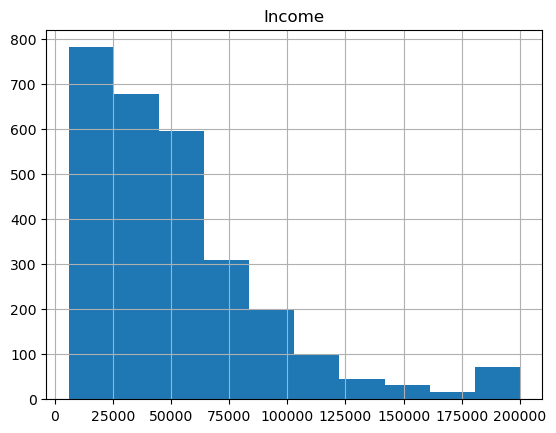

In [133]:
df_2.hist()

Распределение отличается от нормального, проведем лог-трансформацию 

In [135]:
df_2["Income"] = df_2["Income"].apply(np.log10)
df_2

,Income,Gender,MaritalStatus
0,0.653709,male,married or domestic partnership
7,0.662952,male,married or domestic partnership
10,0.633572,male,married or domestic partnership
20,0.724360,female,married or domestic partnership
22,0.698970,female,"single, never married"
...,...,...,...
15611,0.724360,male,married or domestic partnership
15613,0.724360,male,married or domestic partnership
15615,0.602060,male,"single, never married"
15616,0.602060,male,"single, never married"


array([[<Axes: title={'center': 'Income'}>]], dtype=object)

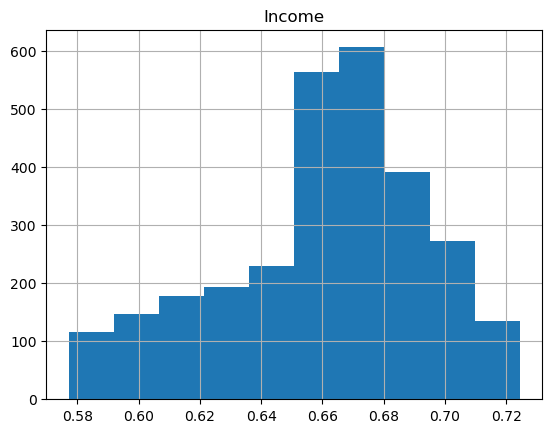

In [136]:
df_2.hist()

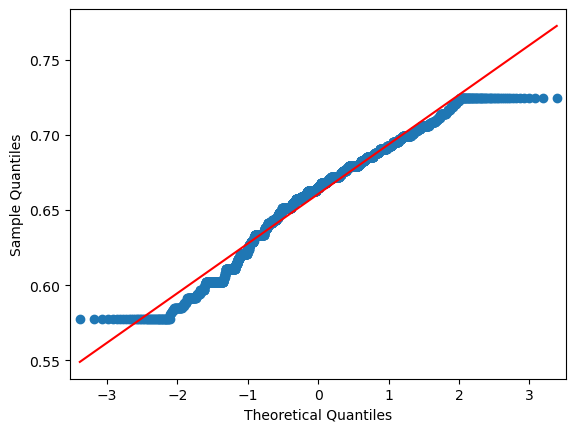

In [139]:
sm.ProbPlot(df_2["Income"]).qqplot(line="r") # qq-plot
plt.show()

Распределение не соответсвует нормальному на хвостах

In [142]:
stats.anderson(df_2["Income"])

AndersonResult(statistic=25.59482796984321, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.6606848385353398, scale=0.03341201478292275)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

A-стат > крит. знач. при alpha = 15 % => распределение отличается от нормального 

Создадим выборку из 100 рандномных элементов

In [157]:
df_2 = df_2.sample(n=100, random_state=99824 , ignore_index=True)
df_2

,Income,Gender,MaritalStatus
0,0.657445,male,married or domestic partnership
1,0.675812,male,married or domestic partnership
2,0.644928,male,"single, never married"
3,0.643249,female,"single, never married"
4,0.662952,male,married or domestic partnership
...,...,...,...
95,0.657445,male,married or domestic partnership
96,0.667753,male,married or domestic partnership
97,0.682408,male,married or domestic partnership
98,0.685303,male,married or domestic partnership


array([[<Axes: title={'center': 'Income'}>]], dtype=object)

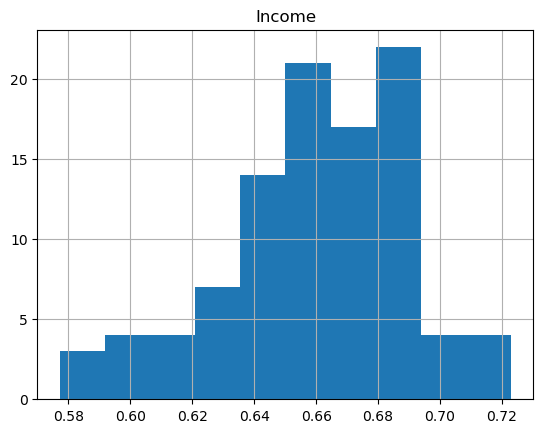

In [158]:
df_2.hist()

In [159]:
stats.shapiro(df_2["Income"])

ShapiroResult(statistic=0.9695354700088501, pvalue=0.020369062200188637)

p-val < 0.05 => распреление отличается от нормального, но оно близко к нормальному, поэтому будет считать, что Income распределены нормально

In [170]:
model = smf.ols("Income ~ C(Gender) * C(MaritalStatus)", df_2)  # строим лин-регресию и обучаем ее
model = model.fit() # обучаем её
sm.stats.anova_lm(model, typ=1)



,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,0.000172,0.000172,0.200057,0.655693
C(MaritalStatus),2.0,0.002927,0.001464,1.706392,0.187036
C(Gender):C(MaritalStatus),2.0,0.003317,0.001659,1.933652,0.150269
Residual,95.0,0.081489,0.000858,NaN,NaN


у всех p-val > 0.05 => принимается основная гопотеза о равенстве средних каждой подвыбоки => брачный статус и пол никак не влияют на заработную плату